In [ ]:
pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 57.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.5 MB/s eta 0:00:00
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284593 sha256=107ab22a4c307894f8a97791c6e03eec27faa145ab204272d3c2de30e2c92f11
  Stored in directory: /root/.cache/pip/wheels/e0/70/4d/81aa6523d4afc0ca0a788c6400874e7765ca7346096d143b37
Successfully built astroNN


In [ ]:
import ssl
import requests

ssl._create_default_https_context = ssl._create_unverified_context
response = requests.get("https://www.astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5",verify=False)

/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.astro.utoronto.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [ ]:
images, labels = galaxy10.load_data()

Galaxy10.h5:  95%|█████████▍| 199M/210M [00:02<00:00, 90.7MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:02, 75.7MB/s]                           


In [ ]:
def show_image(image_data,label):
    label = galaxy10cls_lookup(int(label))
    plt.imshow(image_data)
    plt.title(label)
    plt.show()

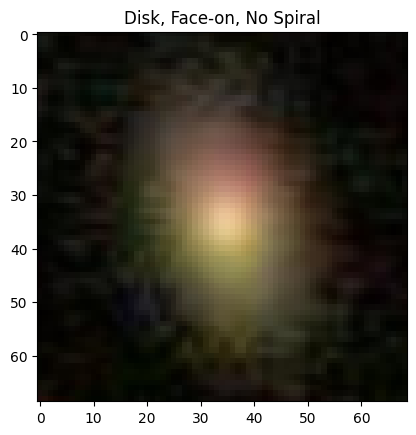

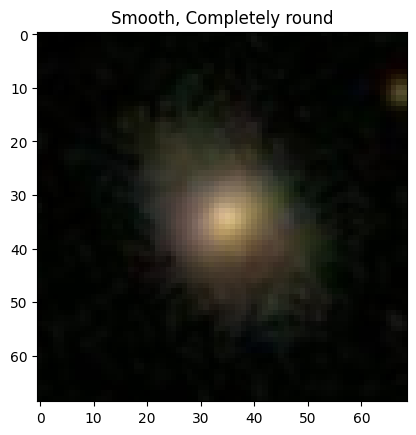

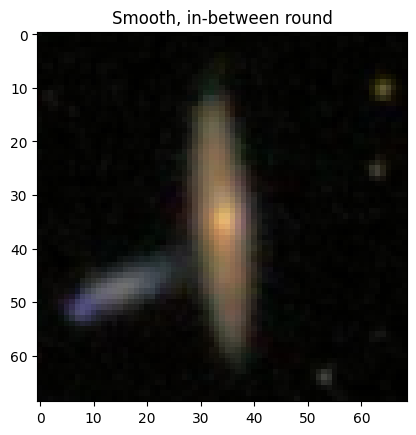

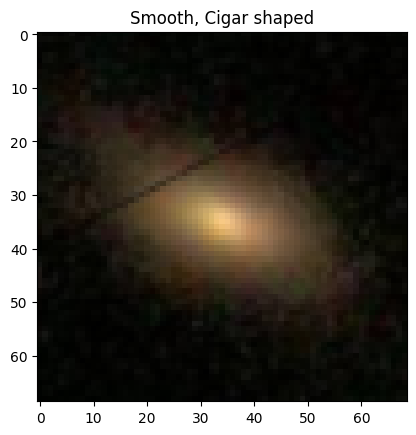

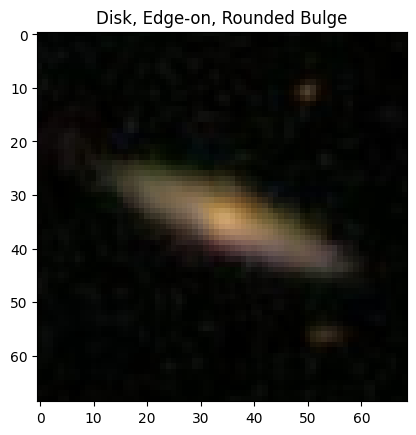

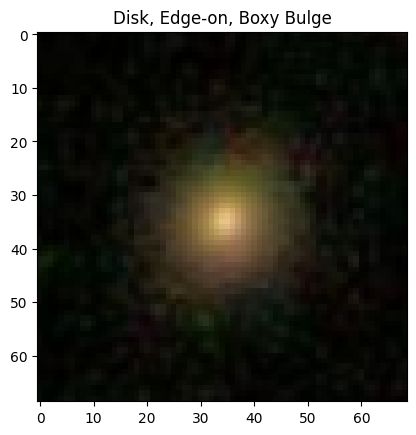

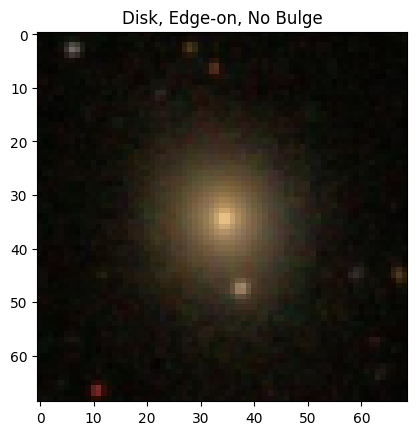

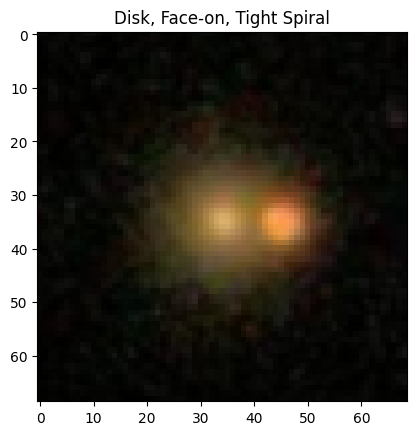

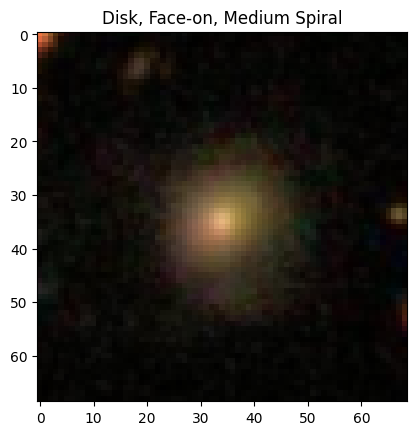

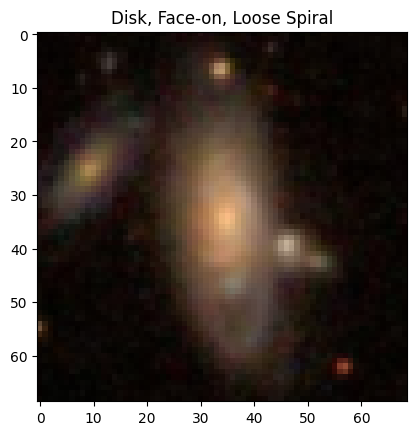

In [ ]:
for i in range(10):
    show_image(images[i], i)

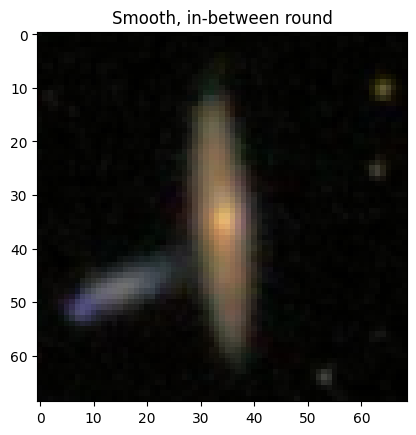

In [ ]:
show_image(images[2], 2)

In [ ]:
import argparse
import cv2

In [ ]:
gray = cv2.cvtColor(images[2], cv2.COLOR_RGB2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
converted_image = (cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

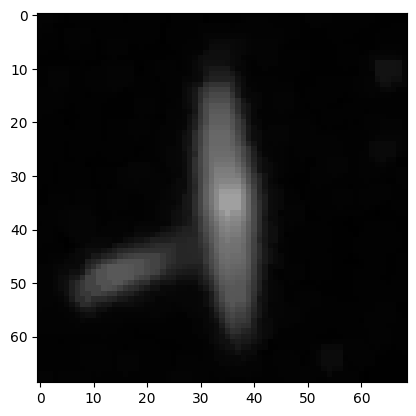

In [ ]:
plt.imshow(converted_image)